# System Analysis

# Initialization

In [1]:
# Helper function to calculate Euclidean distance
import pandas as pd
from numpy import log10, sqrt

def euclid(x, y, df, take_log=False):
    if take_log:
        return sqrt(sum((log10(df[x])-log10(df[y]))**2))
    else:
        return sqrt(sum((df[x]-df[y])**2))
def sema(vect, fig):
    #semantics=', '.join('{}={}'.format(x,y) for (x,y) in fig.pepperargs['default'].items() if x != 'conc')
    nv = []
    for line in vect:
        v = []
        for (x,y) in fig.pepperargs[line].items():
            if x == 'conc': continue
            if x == 'max_complex_size': continue
            if x == 'max_complex_count': continue
            if x == 'max_reaction_count': continue
            if x == 'condensed': 
                z = x if y is True else 'detailed'
            else:
                z = '{}={}'.format(x,y)
            v.append(z)
        nv.append(', '.join(v))
    return nv

In [2]:
from zhang2007 import data; z07 = data()
from yin2008 import data; y08 = data()
from zhang2009 import data; z09 = data()
from zhang2010 import data; z10 = data()
from zhang2011 import data; z11 = data()
from kotani2017 import data; k17 = data()

%who list

k17	 y08	 z07	 z09	 z10	 z11	 


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
# Main Figures:
Table1 = pd.DataFrame()

# Peppercorn estimates
## Zhang 2007

In [5]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z07:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose=0)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        #display(df)
        Table1 = Table1.append(df)


Zhang et al. (2007) Fig. 1 - Single-layer catalytic DSD system (varying catalyst)
Zhang et al. (2007) Fig. 3 - Two-layer feedforward DSD system (varying catalyst)
Zhang et al. (2007) Fig. 4 - Autocatalytic DSD system (varying autocatalyst)


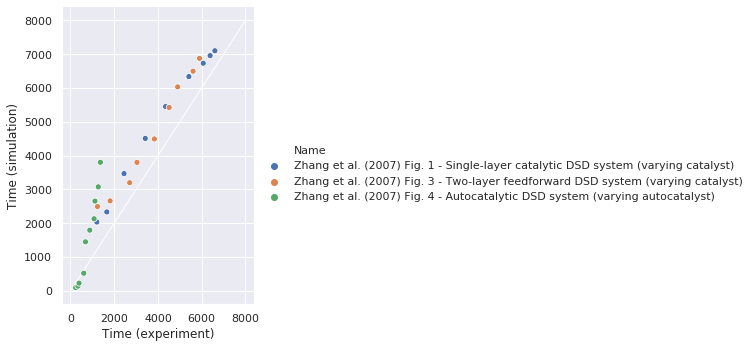

In [6]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z07])]
#display(tmpfig)

# Plot data
sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 8e3)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Yin2008

In [7]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in y08:
    print(fig.name)
    display(fig.pepperargs['default'])
    fig.eval(verbose = 0)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        #display(df)
        Table1 = Table1.append(df)

Yin et al. (2008) Fig. 3 - Autocatalytic hairpin system (varying initiator)


{'conc': 'nM', 'condensed': True, 'k_slow': 1e-05, 'k_fast': 0.1}

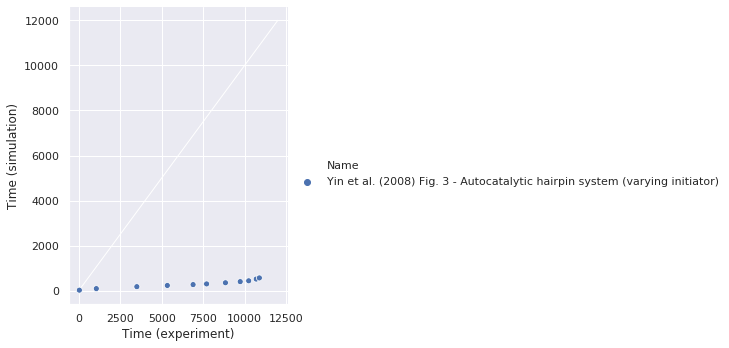

In [8]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in y08])]
#display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 1.2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2009 

In [9]:
for fig in z09:
    print(fig.name)
    print(fig.pepperargs['default'])
    fig.eval()
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)
        

Zhang & Winfree (2009) Fig. 3 - Single strand displacement reactions (varying toehold length)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 3 - Single strand displacement reactions (varying toehold length) -- Fitness: 0.144782
Zhang & Winfree (2009) Fig. 4 - Single toehold exchange reactions (varying toehold lengths)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 4 - Single toehold exchange reactions (varying toehold lengths) -- Fitness: 0.163892
Zhang & Winfree (2009) Fig. 5 - Catalytic DSD system (varying toehold lengths)
{'conc': 'nM', 'condensed': True}
Zhang & Winfree (2009) Fig. 5 - Catalytic DSD system (varying toehold lengths) -- Fitness: 0.41931


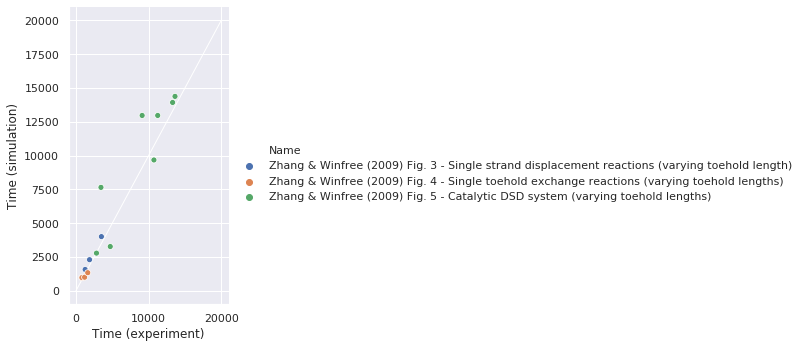

In [10]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z09])]
#display(tmpfig)

sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 2e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

## Zhang 2010

In [11]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in z10:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Zhang & Winfree (2010) Fig. 3A - Catalytic DSD system with 100 nM substrates (varying catalyst)
tmp/Zhang2010-F3A-00: default
tmp/Zhang2010-F3A-00: default
Zhang & Winfree (2010) Fig. 3A - Catalytic DSD system with 100 nM substrates (varying catalyst) -- Fitness: 0.424104
Zhang & Winfree (2010) Fig. 3B - Catalytic DSD system 30 nM substrates (varying catalyst)
tmp/Zhang2010-F3B-00: default
tmp/Zhang2010-F3B-00: default
Zhang & Winfree (2010) Fig. 3B - Catalytic DSD system 30 nM substrates (varying catalyst) -- Fitness: 0.180471
Zhang & Winfree (2010) Fig. 3C - Catalytic DSD system with 3 nM substrates (varying catalyst)
tmp/Zhang2010-F3C-00: default
tmp/Zhang2010-F3C-00: default
Zhang & Winfree (2010) Fig. 3C - Catalytic DSD system with 3 nM substrates (varying catalyst) -- Fitness: 0.03588
Zhang & Winfree (2010) Fig. 3D - Catalytic DSD system with 1 nM substrates (varying catalyst)
tmp/Zhang2010-F3D-00: default
tmp/Zhang2010-F3D-00: default
Zhang & Winfree (2010) Fig. 3D - Catalytic D

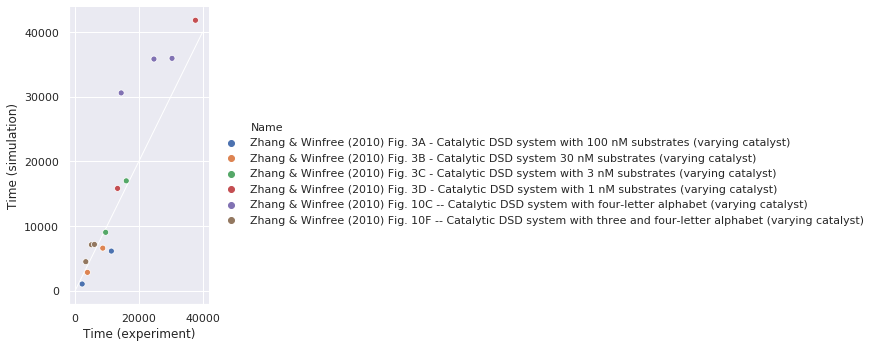

In [12]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in z10])]
#display(tmpfig)
sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
#plt.xscale('log')
#plt.yscale('log')
(mi, ma)=(1e0, 4e4)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Zhang 2011

## Kotani & Hughes 2017

In [13]:
# Generate Peppercorn estimates for every FigureData setup.
for fig in k17:
    print(fig.name)
    #display(fig.pepperargs['default'])
    fig.eval(verbose = 1)
    for df in fig.get_dataframes():
        df['Name']=fig.name
        df['Semantics']=sema(df['Semantics'], fig)
        dist = euclid('Time (experiment)', 'Time (simulation)', df, take_log=True)
        print('{:s} -- Fitness: {:g}'.format(fig.name, dist)) 
        #display(df)
        Table1 = Table1.append(df)

Kotani & Hughes (2017) Fig. 2 - Single-layer catalytic DSD with 4-way branch migration (varying catalyst)
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
tmp/Kotani2017-F2-00: default
Kotani & Hughes (2017) Fig. 2 - Single-layer catalytic DSD with 4-way branch migration (varying catalyst) -- Fitness: 0.233649
Kotani & Hughes (2017) Fig. 3 - Two-layer feedforward DSD system with 4-way branch migration (varying catalyst)
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
tmp/Kotani2017-F3-00: default
Kotani & Hughes (2017) Fig. 3 - Two-layer feedforward DSD system with 4-way branch migration (varying catalyst) -- Fitness: 0.184182
Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst)
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
tmp/Kotani2017-F4-00: default
Kotani & Hughes (2017) Fig. 4 - Autocatalytic DSD system with 4-way branch migration (varying autocatalyst) -- Fit

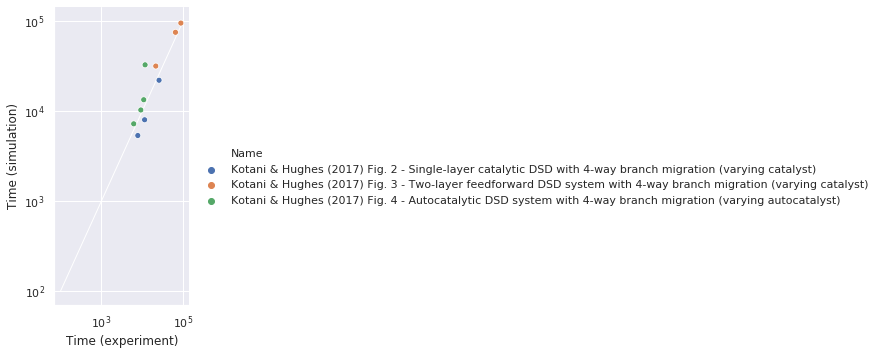

In [14]:
tmpfig = Table1
tmpfig = tmpfig.loc[tmpfig['Name'].isin([fig.name for fig in k17])]

sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
plt.xscale('log')
plt.yscale('log')
(mi, ma)=(1e2, 1e5)
#plt.xlim(mi, ma)
#plt.ylim(mi, ma)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)

# Everything

,Input Filename,Simulation,Reporter,Metric,Semantics,Concentration (simulation),Time (simulation),Concentration (experiment),Time (experiment),Name
0,tmp/Zhang2007-F1-00,C=10,ROX,diagonal-crossing-time:7200:10,condensed,7.175895,2034.113006,7.42,1206,Zhang et al. (2007) Fig. 1 - Single-layer cata...
1,tmp/Zhang2007-F1-00,C=5,ROX,diagonal-crossing-time:7200:10,condensed,6.761861,2332.129563,6.83,1662,Zhang et al. (2007) Fig. 1 - Single-layer cata...
2,tmp/Zhang2007-F1-00,C=2,ROX,diagonal-crossing-time:7200:10,condensed,5.186771,3466.192566,5.79,2450,Zhang et al. (2007) Fig. 1 - Single-layer cata...
3,tmp/Zhang2007-F1-00,C=1,ROX,diagonal-crossing-time:7200:10,condensed,3.742057,4506.250347,4.47,3420,Zhang et al. (2007) Fig. 1 - Single-layer cata...
4,tmp/Zhang2007-F1-00,C=0.5,ROX,diagonal-crossing-time:7200:10,condensed,2.434843,5447.302628,3.25,4350,Zhang et al. (2007) Fig. 1 - Single-layer cata...
5,tmp/Zhang2007-F1-00,C=0.2,ROX,diagonal-crossing-time:7200:10,condensed,1.202435,6334.351908,1.84,5414,Zhang et al. (2007) Fig. 1 - Single-layer cata...
6,tmp/Zhang2007-F1-00,C=0.1,ROX,diagonal-crossing-time:7200:10,condensed,0.654521,6729.373854,1.00,6070,Zhang et al. (2007) Fig. 1 - Single-layer cata...
7,tmp/Zhang2007-F1-00,C=0.05,ROX,diagonal-crossing-time:7200:10,condensed,0.342720,6953.386299,0.58,6383,Zhang et al. (2007) Fig. 1 - Single-layer cata...
8,tmp/Zhang2007-F1-00,C=0.02,ROX,diagonal-crossing-time:7200:10,condensed,0.141140,7098.394355,0.27,6602,Zhang et al. (2007) Fig. 1 - Single-layer cata...
0,tmp/Zhang2007-F3-00,C0=10,ROX,diagonal-crossing-time:7200:10,condensed,6.540175,2491.138397,5.00,1235,Zhang et al. (2007) Fig. 3 - Two-layer feedfor...


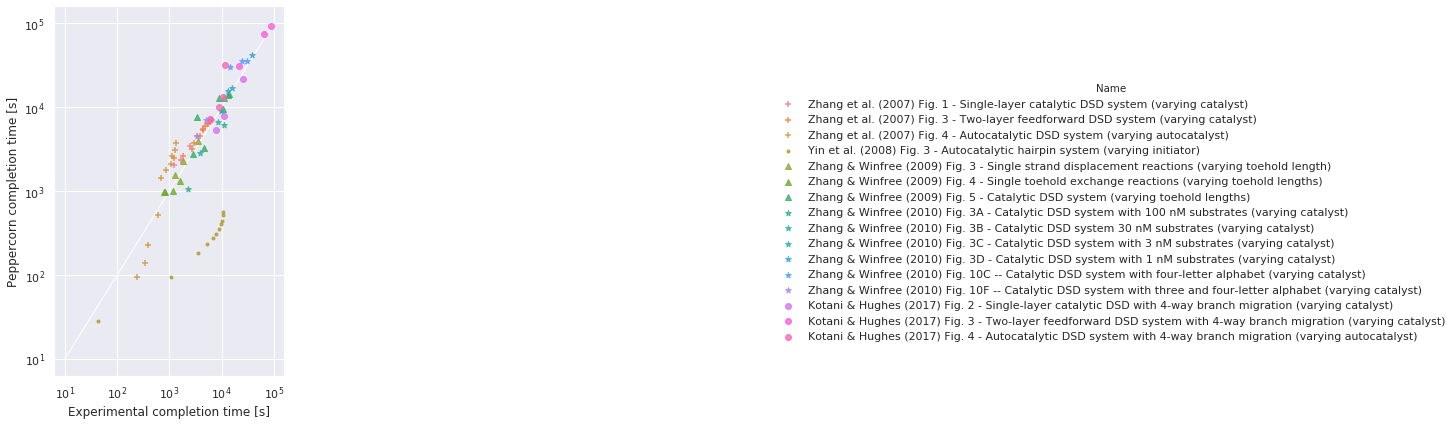

In [15]:
display(Table1)
Table1.to_latex('ManySystems.tex', index=False, float_format='{:.3g}'.format)
tmpfig = Table1
#tmpfig.reset_index(inplace=True, drop=True)
#tmpfig = tmpfig.iloc[0:-1]
#tmpfig = tmpfig.iloc[[4,5,6,7,28,29,30,31], :]
#display(tmpfig)


#sns.set_palette("husl")
#sns.set(rc={'figure.figsize':(4,4)})


m = ['+'] * 3
m += ['.']
m += ['^'] * 3
m += ['*'] * 6
#m += ['v']
m += ['o'] * 3

#g = sns.relplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig)
g = sns.lmplot(x="Time (experiment)", y="Time (simulation)", hue='Name', data=tmpfig, fit_reg=False, markers=m, legend=True)

plt.xscale('log')
plt.yscale('log')
#plt.xlim(1e3, 1e5)
#plt.ylim(1e2, 1e6)
(mi, ma)=(1e1, 1e5)
plt.plot([mi, ma], [mi, ma], linewidth=1, color='white',zorder=0)
plt.gcf().set_size_inches(24.5,6.2)

g.set(xlabel='Experimental completion time [s]')  
g.set(ylabel='Peppercorn completion time [s]')

plt.savefig('all_systems.pdf', bbox_inches='tight')
plt.savefig('all_systems.svg', bbox_inches='tight')